In [0]:
import pandas as pd
import numpy as np

# Enter Path here

In [0]:
train = pd.read_pickle('path to train.pkl')
test = pd.read_pickle('path to test.pkl')

In [0]:
def getTweetAndLabel(df):
    tweet = []
    label = []
    for i in range(len(df)):
        tweet.append(str(df.iloc[i,0]))
        label.append(list(df.iloc[i,1:]))
    return tweet,label

    
x_train,y_train=getTweetAndLabel(train)
x_test,y_test=getTweetAndLabel(test)

# Statistics

In [16]:
stat = [0 for _ in range(8)]
for i in range(len(train)):
  for j in range(8):
    if train.iloc[i,j+1] == 1:
      stat[j]+=1

stat.append(len(train))
print("Total possible disease present per class out of total length")
categories = ['Influenza', 'Diarrhea', 'Hayfever', 'Cough', 'Headache',
              'Fever', 'Runnynose', 'Cold','Total']
stat

Total possible disease present per class out of total length


[106, 182, 163, 227, 251, 345, 375, 265, 1920]

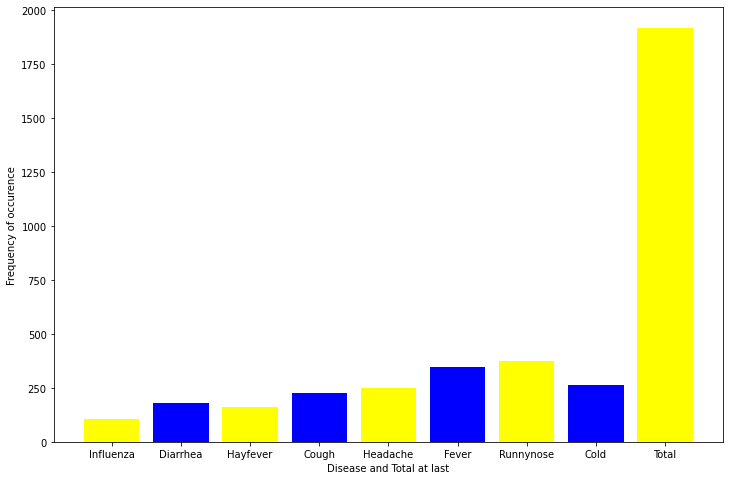

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.bar(categories,stat,color=['yellow','blue'])
plt.xlabel('Disease and Total at last')
plt.ylabel('Frequency of occurence')
plt.show()

In [0]:
tweets = list(train['Tweet'])
test_tweets = list(test['Tweet'])

# Preprocessing

In [20]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

In [0]:
def decontracted(paragraph):
    # specific
    paragraph = re.sub(r"won\'t", "will not", paragraph)
    paragraph = re.sub(r"can\'t", "can not", paragraph)

    # general
    paragraph = re.sub(r"n\'t", " not", paragraph)
    paragraph = re.sub(r"\'re", " are", paragraph)
    paragraph = re.sub(r"\'s", " is", paragraph)
    paragraph = re.sub(r"\'d", " would", paragraph)
    paragraph = re.sub(r"\'ll", " will", paragraph)
    paragraph = re.sub(r"\'t", " not", paragraph)
    paragraph = re.sub(r"\'ve", " have", paragraph)
    paragraph = re.sub(r"\'m", " am", paragraph)
    return paragraph

def rmPunctuationAndNumberAndLower(paragraph):
    paragraph = re.sub("<.*?>","",paragraph) 
    paragraph = re.sub("[@!-\?.:;/+*$,/()\n]"," ",paragraph)
    paragraph = re.sub("[-]"," ",paragraph)
    paragraph = re.sub("\["," ",paragraph)
    paragraph = re.sub("\]"," ",paragraph)
    paragraph = re.sub('[0-9]',"",paragraph)
    paragraph = paragraph.lower()
    return paragraph

def Tokenization(paragraph):
    paragraph = word_tokenize(paragraph)
    return paragraph

def rmStopwords(paragraph):
    tempList = [words for words in paragraph if  words not in stop_words]
    return tempList

def stemming(paragraph):
    ps = PorterStemmer()
    newList = []
    for word in paragraph:
        # print(word)
        newList.append(ps.stem(word))
    paragraph = newList
    return paragraph

def joinToken(paragraph):
    return ' '.join(paragraph)



In [0]:
def preprocessing(paragraph):
    
    paragraph = rmPunctuationAndNumberAndLower(paragraph)
    paragraph = decontracted(paragraph)
    paragraph = Tokenization(paragraph)
    paragraph = rmStopwords(paragraph)
    paragraph = stemming(paragraph)
    paragraph.sort()  #alphabetical order
    paragraph = joinToken(paragraph)
    return paragraph

# tweets = preprocessing(tweets)
for i in range(len(tweets)):
  tweets[i] = preprocessing(tweets[i])
for i in range(len(test_tweets)):
  test_tweets[i] = preprocessing(test_tweets[i])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# One-vs-Rest Support vector classifier

In [0]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

In [26]:
multiclass_pred = []
for category in categories[:8]:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(tweets, list(train[category]))
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(test_tweets)
    multiclass_pred.append(prediction)
    print('Test accuracy is {}'.format(accuracy_score(list(test[category]), prediction)))

... Processing Influenza
Test accuracy is 0.971875
... Processing Diarrhea
Test accuracy is 0.9796875
... Processing Hayfever
Test accuracy is 0.9765625
... Processing Cough
Test accuracy is 0.984375
... Processing Headache
Test accuracy is 0.98125
... Processing Fever
Test accuracy is 0.946875
... Processing Runnynose
Test accuracy is 0.9296875
... Processing Cold
Test accuracy is 0.95625


In [29]:
for i in range(8):
    multiclass_pred[i] = np.array(multiclass_pred[i])

multiclass_pred=np.array(multiclass_pred)
multiclass_pred_trans = multiclass_pred.transpose()

ExactMatch = 0
for i in range(len(test)):
  correctCount = 0
  for j in range(1,9):
    if multiclass_pred_trans[i][j-1] == test.iloc[i,j]:
      correctCount+=1
  if correctCount == 8:
    ExactMatch += 1
print("Exact match accuracy:")
(ExactMatch/len(test))*100

Exact match accuracy:


77.1875

# Label Power set method

In [32]:
!pip install scikit-multilearn

     |████████████████████████████████| 92kB 2.8MB/s 


In [0]:
vectorizer = TfidfVectorizer(stop_words=stop_words)
vectors = vectorizer.fit_transform(tweets)
testVectors = vectorizer.transform(test_tweets)

In [0]:
# this method require label value 0 and 1 instead on -1 and 1.
y_train_copy = y_train.copy()
y_train = []

for i in range(len(y_train_copy)):
    temp = []
    for j in range(len(y_train_copy[i])):
        if int(y_train_copy[i][j]) == 1:
            temp.append(int(y_train_copy[i][j]))
        else:
            temp.append(0)
    y_train.append(np.array(temp))

y_train = np.array(y_train)

y_test_copy = y_test.copy()
y_test = []

for i in range(len(y_test_copy)):
    temp = []
    for j in range(len(y_test_copy[i])):
        if int(y_test_copy[i][j]) == 1:
            temp.append(int(y_test_copy[i][j]))
        else:
            temp.append(0)
    y_test.append(np.array(temp))
    
y_test = np.array(y_test)

In [58]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset
# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())
# train
classifier.fit(vectors, y_train)
# predict
predictions = classifier.predict(testVectors)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

Accuracy =  0.7515625


